In [1]:
%matplotlib inline

import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')

### Build Graph

In [2]:
df = pd.read_csv("transactiongraph3.csv")

In [3]:
graph = nx.from_pandas_edgelist(df,source="addressIn",target="addressOut")

In [4]:
nx.info(graph)

'Graph with 3531 nodes and 3683 edges'

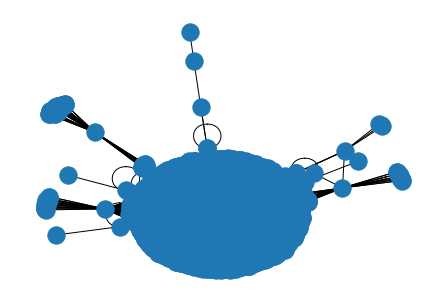

In [5]:
nx.draw(graph, with_labels = False)

### Node2Vec Algorithm

In [4]:
node2vec = Node2Vec(graph, dimensions=20, walk_length=16, num_walks=100, workers=2)

Computing transition probabilities:   0%|          | 0/3531 [00:00<?, ?it/s]

In [5]:
model = node2vec.fit(window=10, min_count=1)

In [8]:
type(model)

gensim.models.word2vec.Word2Vec

In [9]:
embeddings = np.array(model)

In [10]:
type(embeddings)

numpy.ndarray

In [11]:
print(embeddings)

Word2Vec(vocab=3531, vector_size=20, alpha=0.025)


In [12]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)

In [13]:
#embeddings_2d = tsne.fit_transform(embeddings)

In [14]:
tsne

TSNE(perplexity=15, random_state=7)

In [16]:
model.batch_words

10000

In [22]:
#print(len(model.wv.vocab))
print(model.wv.vectors.shape)

(3531, 20)


In [23]:
model.wv.vectors

array([[ 0.12712614, -0.06075263,  0.1159566 , ..., -0.30490628,
        -0.12048384, -0.31528115],
       [ 1.1845638 ,  0.4229202 ,  0.47704902, ..., -0.8071011 ,
         0.2254048 , -0.44822925],
       [-0.6827859 ,  0.63007164, -0.05420518, ..., -1.0933572 ,
        -0.07730571,  0.7316791 ],
       ...,
       [-0.27236158,  0.49516216,  0.27348962, ..., -0.4991433 ,
         0.15570478, -1.085496  ],
       [-0.72994184,  0.35679394, -0.01980295, ..., -1.3472663 ,
        -0.0578468 ,  0.7756674 ],
       [ 0.99801326,  0.83577806,  0.31989995, ..., -0.93249464,
         0.2616889 , -0.18014637]], dtype=float32)

In [24]:
tsne.fit(model.wv.vectors)

TSNE(perplexity=15, random_state=7)

In [26]:
df.shape

(3683, 2)

In [27]:
df

,addressIn,addressOut
0,-2,11554
1,-2,11512
2,-2,11466
3,-2,12714
4,-2,11236
...,...,...
3678,-2,9832
3679,-2,10766
3680,-2,11597
3681,-2,10749


In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
x = model.wv.vectors

In [31]:
principalComponents = pca.fit_transform(x)

In [37]:
df_ = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

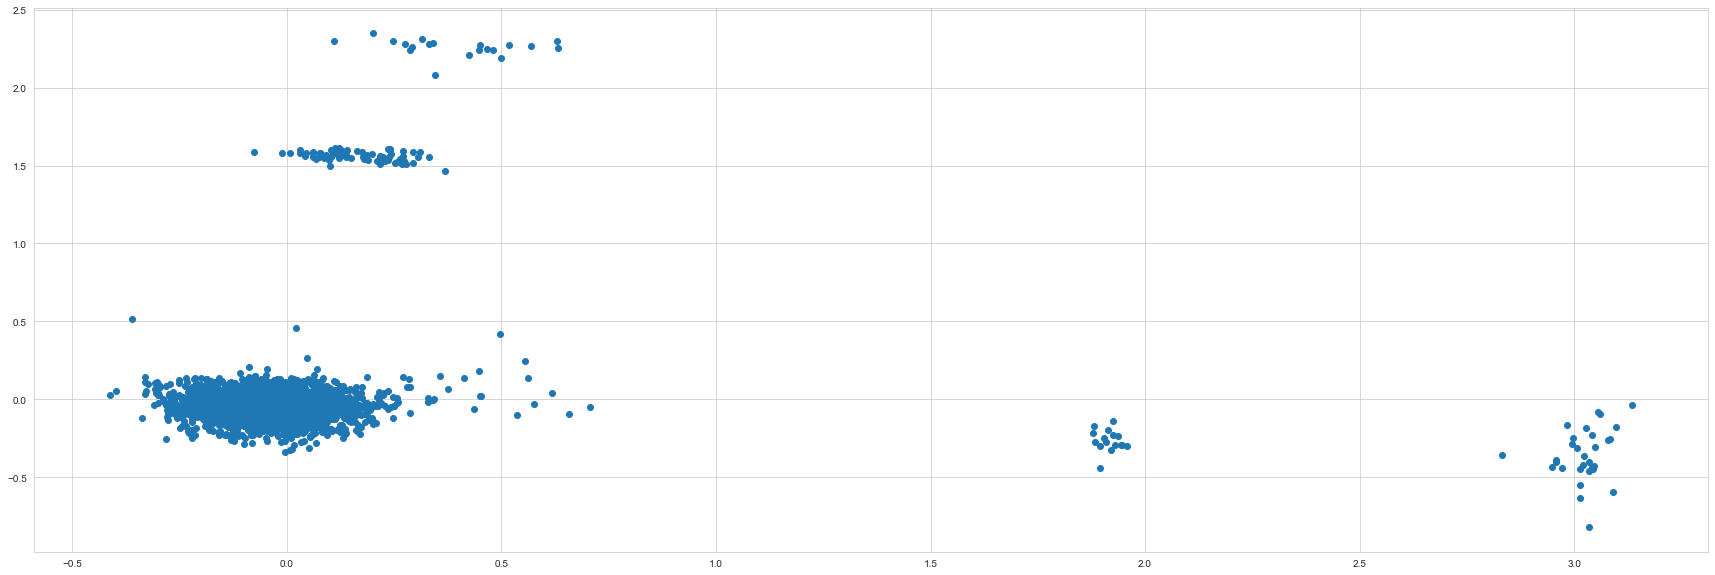

In [52]:
plt.rcParams["figure.figsize"] = (30,10)
plt.scatter(df_.iloc[:,0],df_.iloc[:,1])

### Classification algorithms

In [70]:
from sklearn.cluster import KMeans


In [83]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_)

In [84]:
classes = kmeans.predict(df_)

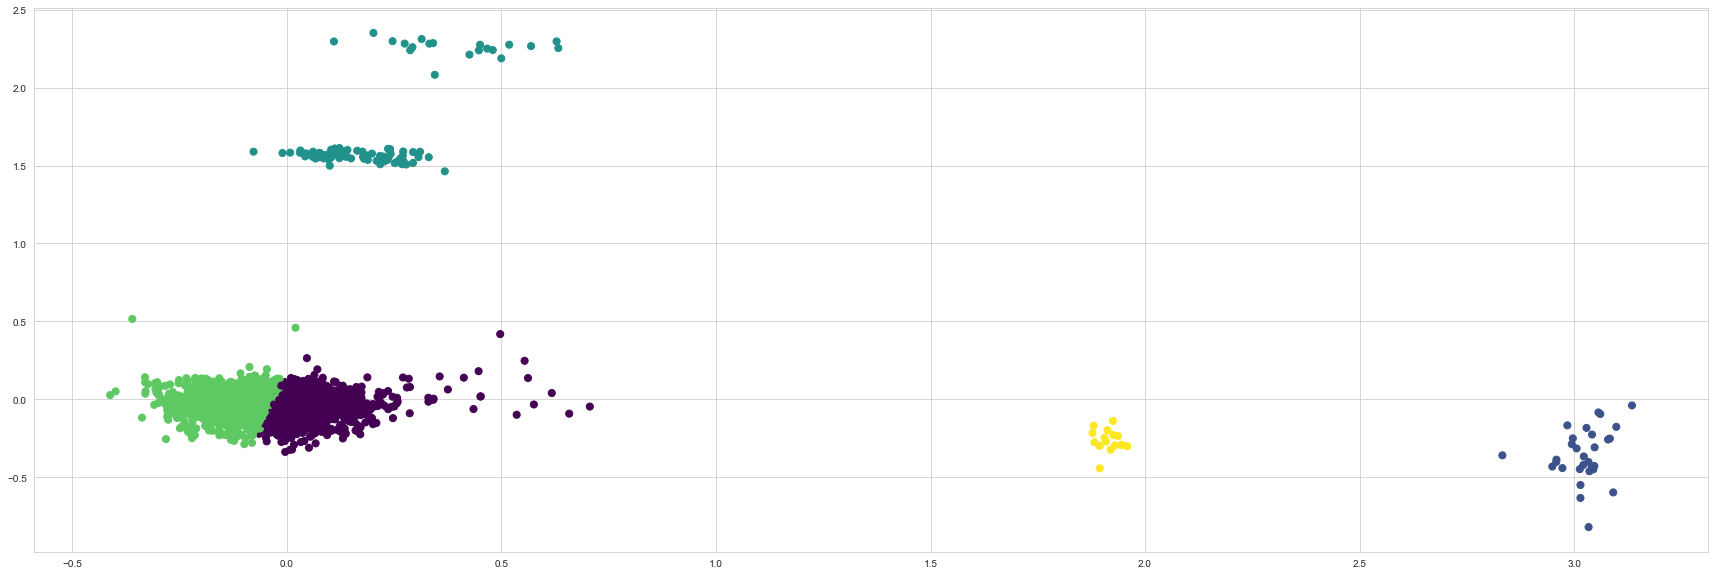

In [85]:
plt.scatter(df_.iloc[:, 0], df_.iloc[:, 1], c=classes, s=50, cmap='viridis')

In [86]:
from sklearn.cluster import SpectralClustering


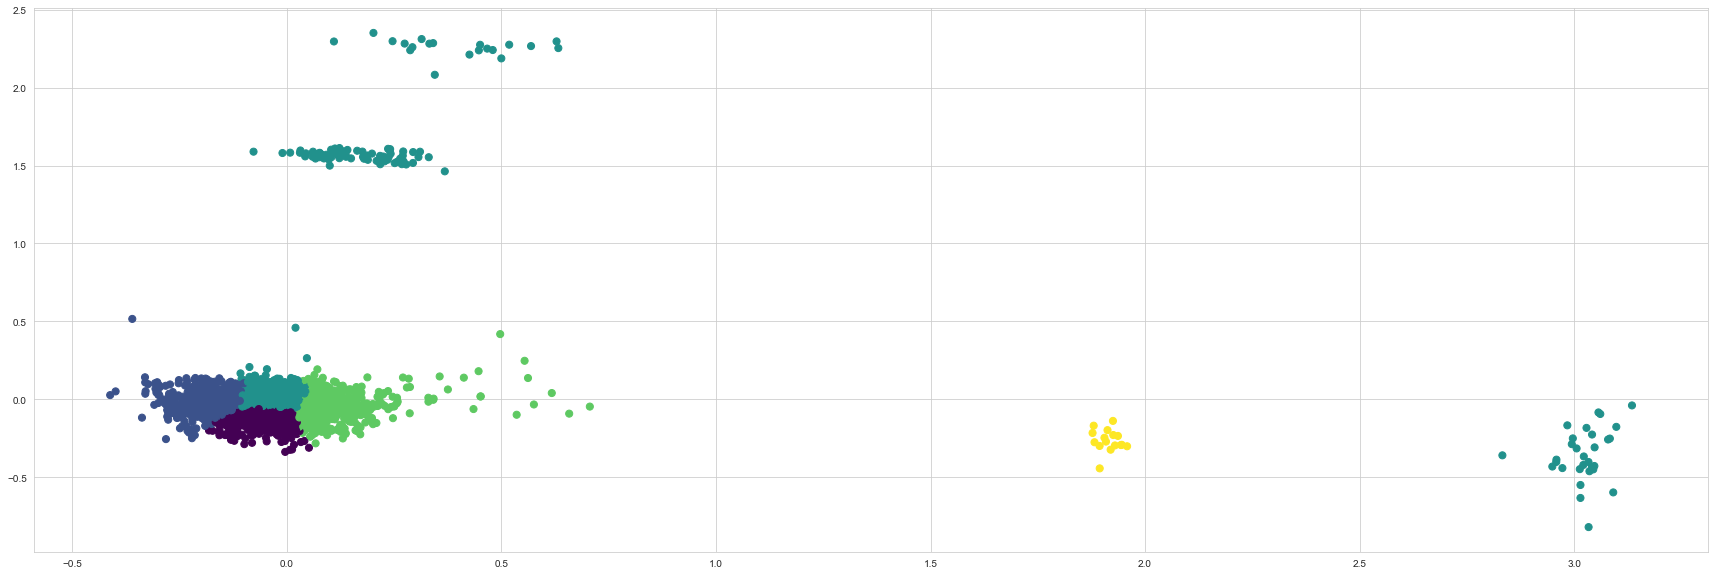

In [87]:
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(df_)
plt.scatter(df_.iloc[:, 0], df_.iloc[:, 1], c=labels, s=50, cmap='viridis')

In [90]:
from sklearn.cluster import AgglomerativeClustering

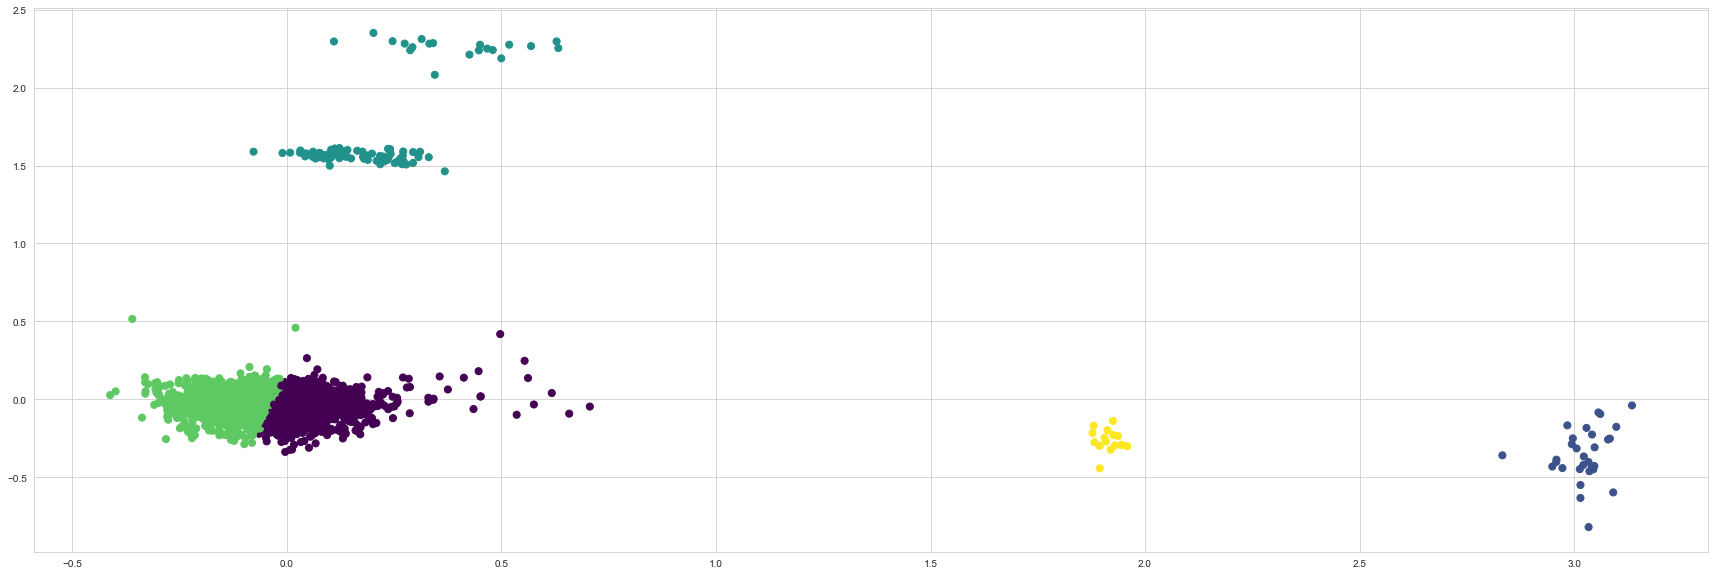

In [91]:
model = AgglomerativeClustering()
labels = model.fit_predict(df_)
plt.scatter(df_.iloc[:, 0], df_.iloc[:, 1], c=classes, s=50, cmap='viridis')